<a href="https://colab.research.google.com/github/Deyonrose/S5_PredictiveAnalysis/blob/main/2348513_PA_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **DataPreprocessing**

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseVal')

print(X.head())
print(y.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


Handle Missing Values

In [2]:
# Check for missing values
print(X.isnull().sum())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


Normalize/Scale the Features

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Exploratory Data Analysis (EDA)**

correlation matrix

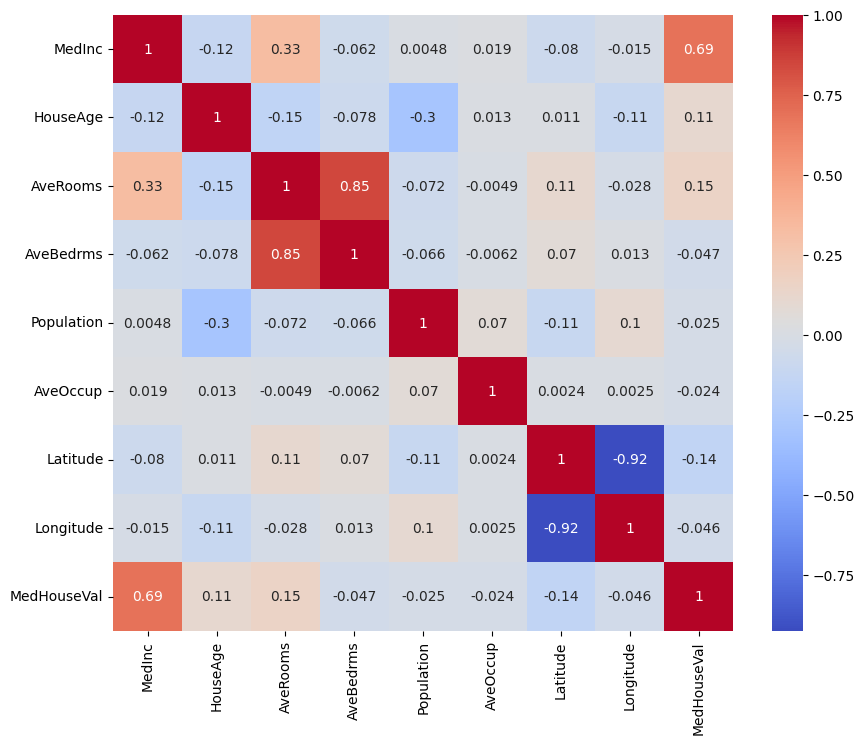

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = pd.concat([X, y], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


Scatter plot

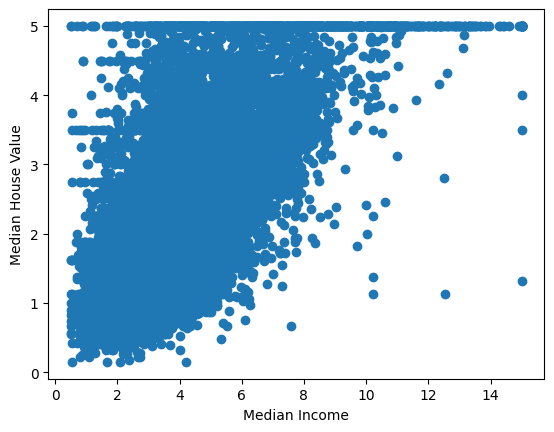

In [5]:
# Scatter plot of Median Income vs. House Value
plt.scatter(X['MedInc'], y)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


Histogram for Data Distribution

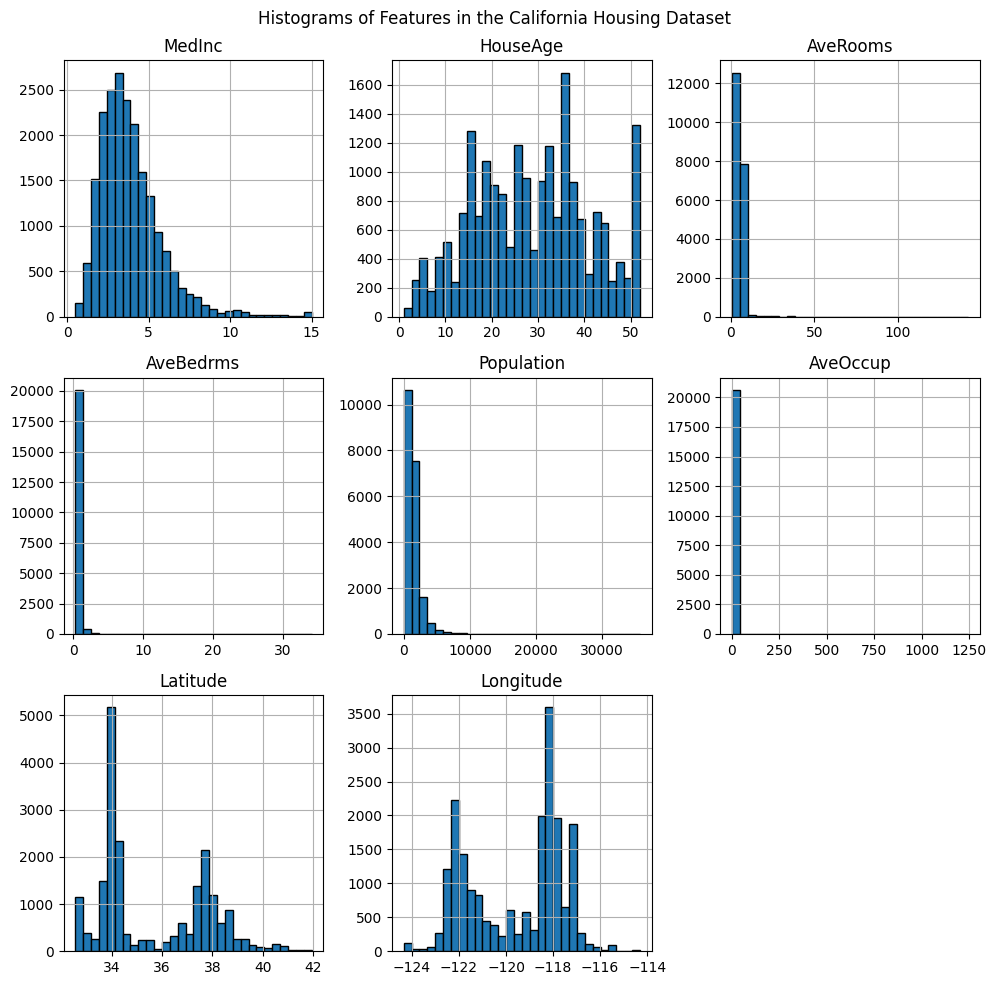

In [6]:
# Plot histograms for each feature
X.hist(bins=30, figsize=(10, 10), edgecolor='black')
plt.suptitle('Histograms of Features in the California Housing Dataset')
plt.tight_layout()
plt.show()


**Model Building**

1. Multiple Linear Regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Multiple Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluation
print('Multiple Linear Regression:')
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R-squared:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


Multiple Linear Regression:
RMSE: 0.7455813830127761
R-squared: 0.5757877060324511
MAE: 0.5332001304956565


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2. Ridge Regression (L2 Regularization)

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}  # Regularization strength

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)

y_pred_ridge = ridge_grid.predict(X_test)

print('Ridge Regression:')
print('Best Alpha:', ridge_grid.best_params_)
print('RMSE:', mean_squared_error(y_test, y_pred_ridge, squared=False))
print('R-squared:', r2_score(y_test, y_pred_ridge))
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))


Ridge Regression:
Best Alpha: {'alpha': 0.1}
RMSE: 0.745578665891467
R-squared: 0.5757907979394903
MAE: 0.5331994387872134


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3. Lasso Regression (L1 Regularization)

In [9]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_params = {'alpha': [0.1, 1, 10, 100]}  # Regularization strength

lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)

y_pred_lasso = lasso_grid.predict(X_test)

print('Lasso Regression:')
print('Best Alpha:', lasso_grid.best_params_)
print('RMSE:', mean_squared_error(y_test, y_pred_lasso, squared=False))
print('R-squared:', r2_score(y_test, y_pred_lasso))
print('MAE:', mean_absolute_error(y_test, y_pred_lasso))


Lasso Regression:
Best Alpha: {'alpha': 0.1}
RMSE: 0.824349148731848
R-squared: 0.4814202815313765
MAE: 0.6221475526943097


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Comparison of Results**

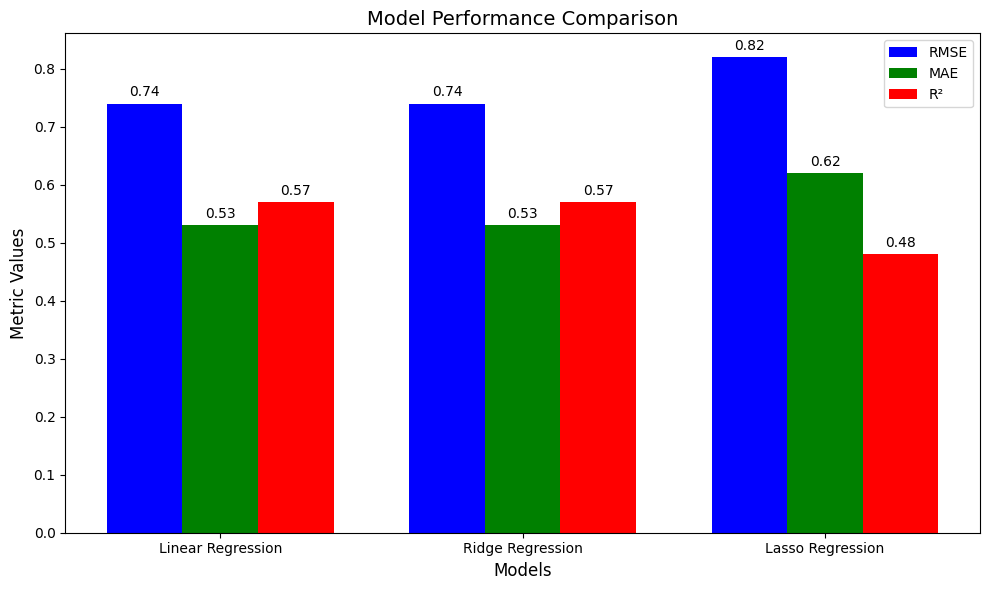

In [10]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
rmse_values = [0.74, 0.74, 0.82]
mae_values = [0.53, 0.53, 0.62]
r2_values = [0.57, 0.57, 0.48]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width and positions
bar_width = 0.25
index = np.arange(len(models))

# Plotting the bars for RMSE, MAE, and R²
bar1 = ax.bar(index, rmse_values, bar_width, label='RMSE', color='blue')
bar2 = ax.bar(index + bar_width, mae_values, bar_width, label='MAE', color='green')
bar3 = ax.bar(index + 2 * bar_width, r2_values, bar_width, label='R²', color='red')

# Adding labels and title
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Metric Values', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of each bar
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bar1)
add_value_labels(bar2)
add_value_labels(bar3)

# Show the plot
plt.tight_layout()
plt.show()


#Inference


**Overview:**
   The above plot displays the performance metrics for three regression models: Linear Regression, Ridge Regression, and Lasso Regression. The metrics compared are Root Mean Square Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²).

**Analysis:**

   - **RMSE (Orange Bars):**
     - **Interpretation:** Both Linear Regression and Ridge Regression have the lowest RMSE values of 0.74, indicating that they have better predictive accuracy compared to Lasso Regression. The Lasso Regression model shows a higher RMSE, suggesting it has higher prediction errors.

   - **MAE (Green Bars):**
     - **Interpretation:** Both Linear Regression and Ridge Regression have the same lower MAE values when compared to Lasso Regression.

   - **R² (Blue Bars):**
     - **Interpretation:** Lasso Regression has the lowest R² value of 0.48, indicating it explains more of the variance in the dependent variable compared to Linear and Ridge Regression. Both Linear and Ridge Regression have the same R² value of 0.57.


  **Overall Performance:** We can see both Linear and Ridge regression, shows the highest performance in terms of MAE, indicating it has the highest lowest average errors. However, Lasso has a higher lower R square compared to Linear and Ridge Regression.

